# Utillizing Distance and Latitudes and Longitudes to input values, thereby increasing locations that can be used

## 1.0 Getting Distances and merging latitudes and longitudes to our main table

In [2]:
import pandas as pd

In [6]:
import openrouteservice
import itertools

# Initialize OpenRouteService client with your API key
api_key = '5b3ce3597851110001cf6248567a5e6a76fe4f208213faea9067e83b'  # Replace with your actual ORS API key
client = openrouteservice.Client(key=api_key)

# Read lat_lon CSV file
df = pd.read_csv('locations_with_lat_lon.csv')  # Assumes your CSV has columns: name, lat, lon

# Create a list of location coordinates
locations = list(zip(df['Latitude'], df['Longitude']))

# Prepare list for storing distances
distance_data = []

# Generate all possible pairs of locations
for (name_from, lat_from, lon_from), (name_to, lat_to, lon_to) in itertools.combinations(df.itertuples(index=False), 2):
    # Get the route between the two locations
    coords = ((lon_from, lat_from), (lon_to, lat_to))
    route = client.directions(coords)
    
    # Extract distance from the route (in meters)
    distance = route['routes'][0]['summary']['distance']
    
    # Store the route information and distance in the list
    distance_data.append({
        'route_from': name_from,
        'route_to': name_to,
        'distance_meters': distance
    })

# Convert to a DataFrame
df_distance = pd.DataFrame(distance_data)

# Save the result to a CSV file
df_distance.to_csv('route_distances.csv', index=False)

print("Distance calculations saved to route_distances.csv")


Distance calculations saved to route_distances.csv


In [3]:
df = pd.read_csv('route_distances.csv')
df

,route_from,route_to,distance_meters
0,Express Avenue Mall,Chennai Citi Centre,2912.4
1,Express Avenue Mall,Chennai Lighthouse,3699.5
2,Express Avenue Mall,Marina Beach,3359.9
3,Express Avenue Mall,Semmozhi Poonga,2948.5
4,Express Avenue Mall,Sai Baba Temple Mylapore,3833.1
5,Express Avenue Mall,PVR Ampa SkyOne,7417.2
6,Chennai Citi Centre,Chennai Lighthouse,1902.5
7,Chennai Citi Centre,Marina Beach,3266.2
8,Chennai Citi Centre,Semmozhi Poonga,2701.3
9,Chennai Citi Centre,Sai Baba Temple Mylapore,2447.1


In [4]:
df_1 = pd.read_csv('data/justadf.csv')
df_1

,route_from,route_to,ride_type,ride_max_persons,hour,day_of_week,ride_waiting_time,ride_time_minutes,ride_price
0,Chennai Citi Centre,Chennai Lighthouse,Go Sedan,4.0,17,1,6.000000,7.983333,147.060000
1,Chennai Citi Centre,Chennai Lighthouse,Moto,1.0,17,1,5.333333,7.983333,35.416667
2,Chennai Citi Centre,Chennai Lighthouse,Premier,4.0,17,1,6.000000,8.316667,199.183333
3,Chennai Citi Centre,Chennai Lighthouse,Uber Auto,3.0,17,1,1.333333,7.650000,70.000000
4,Chennai Citi Centre,Chennai Lighthouse,Uber Go,4.0,17,1,6.000000,8.650000,143.010000
...,...,...,...,...,...,...,...,...,...
17377,Semmozhi Poonga,Sai Baba Temple Mylapore,Moto,1.0,20,0,3.000000,16.133333,45.650000
17378,Semmozhi Poonga,Sai Baba Temple Mylapore,Premier,4.0,20,0,3.000000,16.133333,226.700000
17379,Semmozhi Poonga,Sai Baba Temple Mylapore,Uber Auto,3.0,20,0,2.000000,16.133333,156.730000
17380,Semmozhi Poonga,Sai Baba Temple Mylapore,Uber Go,4.0,20,0,6.000000,18.133333,143.850000


In [5]:
df_1['route_to'].value_counts()

route_to
Chennai Lighthouse          2664
Chennai Citi Centre         2664
Marina Beach                2430
Sai Baba Temple Mylapore    2418
Express Avenue Mall         2406
PVR Ampa SkyOne             2406
Semmozhi Poonga             2394
Name: count, dtype: int64

In [6]:
# Create consistent key for df (route distances)
df['route_key'] = df.apply(lambda x: tuple(sorted([x['route_from'], x['route_to']])), axis=1)

# Create consistent key for df1 (ride data)
df_1['route_key'] = df_1.apply(lambda x: tuple(sorted([x['route_from'], x['route_to']])), axis=1)

# Merge df1 with df on route_key
merged_df = pd.merge(df_1, df[['route_key', 'distance_meters']], on='route_key', how='left')
merged_df

,route_from,route_to,ride_type,ride_max_persons,hour,day_of_week,ride_waiting_time,ride_time_minutes,ride_price,route_key,distance_meters
0,Chennai Citi Centre,Chennai Lighthouse,Go Sedan,4.0,17,1,6.000000,7.983333,147.060000,"(Chennai Citi Centre, Chennai Lighthouse)",1902.5
1,Chennai Citi Centre,Chennai Lighthouse,Moto,1.0,17,1,5.333333,7.983333,35.416667,"(Chennai Citi Centre, Chennai Lighthouse)",1902.5
2,Chennai Citi Centre,Chennai Lighthouse,Premier,4.0,17,1,6.000000,8.316667,199.183333,"(Chennai Citi Centre, Chennai Lighthouse)",1902.5
3,Chennai Citi Centre,Chennai Lighthouse,Uber Auto,3.0,17,1,1.333333,7.650000,70.000000,"(Chennai Citi Centre, Chennai Lighthouse)",1902.5
4,Chennai Citi Centre,Chennai Lighthouse,Uber Go,4.0,17,1,6.000000,8.650000,143.010000,"(Chennai Citi Centre, Chennai Lighthouse)",1902.5
...,...,...,...,...,...,...,...,...,...,...,...
17377,Semmozhi Poonga,Sai Baba Temple Mylapore,Moto,1.0,20,0,3.000000,16.133333,45.650000,"(Sai Baba Temple Mylapore, Semmozhi Poonga)",4202.3
17378,Semmozhi Poonga,Sai Baba Temple Mylapore,Premier,4.0,20,0,3.000000,16.133333,226.700000,"(Sai Baba Temple Mylapore, Semmozhi Poonga)",4202.3
17379,Semmozhi Poonga,Sai Baba Temple Mylapore,Uber Auto,3.0,20,0,2.000000,16.133333,156.730000,"(Sai Baba Temple Mylapore, Semmozhi Poonga)",4202.3
17380,Semmozhi Poonga,Sai Baba Temple Mylapore,Uber Go,4.0,20,0,6.000000,18.133333,143.850000,"(Sai Baba Temple Mylapore, Semmozhi Poonga)",4202.3


In [7]:
merged_df.drop('route_key',axis=1,inplace=True)
merged_df.head(1)

,route_from,route_to,ride_type,ride_max_persons,hour,day_of_week,ride_waiting_time,ride_time_minutes,ride_price,distance_meters
0,Chennai Citi Centre,Chennai Lighthouse,Go Sedan,4.0,17,1,6.0,7.983333,147.06,1902.5


In [8]:
df = merged_df.copy()

In [9]:
df2 = pd.read_csv('locations_with_lat_lon.csv')
df2

,name,Latitude,Longitude
0,Express Avenue Mall,13.058821,80.264103
1,Chennai Citi Centre,13.043025,80.273870
2,Chennai Lighthouse,13.039716,80.279442
3,Marina Beach,13.053275,80.283289
4,Semmozhi Poonga,13.050626,80.251510
5,Sai Baba Temple Mylapore,13.032698,80.264734
6,PVR Ampa SkyOne,13.073553,80.221499


In [10]:
# Merge df with df2 for route_from
df = pd.merge(df, df2, how='left', left_on='route_from', right_on='name')
df.rename(columns={'Latitude': 'lat_route_from', 'Longitude': 'lon_route_from'}, inplace=True)
df.drop('name', axis=1, inplace=True)  # Drop the 'name' column after merging

# Merge df with df2 for route_to
df = pd.merge(df, df2, how='left', left_on='route_to', right_on='name')
df.rename(columns={'Latitude': 'lat_route_to', 'Longitude': 'lon_route_to'}, inplace=True)
df.drop('name', axis=1, inplace=True)  # Drop the 'name' column after merging


In [11]:
df

,route_from,route_to,ride_type,ride_max_persons,hour,day_of_week,ride_waiting_time,ride_time_minutes,ride_price,distance_meters,lat_route_from,lon_route_from,lat_route_to,lon_route_to
0,Chennai Citi Centre,Chennai Lighthouse,Go Sedan,4.0,17,1,6.000000,7.983333,147.060000,1902.5,13.043025,80.27387,13.039716,80.279442
1,Chennai Citi Centre,Chennai Lighthouse,Moto,1.0,17,1,5.333333,7.983333,35.416667,1902.5,13.043025,80.27387,13.039716,80.279442
2,Chennai Citi Centre,Chennai Lighthouse,Premier,4.0,17,1,6.000000,8.316667,199.183333,1902.5,13.043025,80.27387,13.039716,80.279442
3,Chennai Citi Centre,Chennai Lighthouse,Uber Auto,3.0,17,1,1.333333,7.650000,70.000000,1902.5,13.043025,80.27387,13.039716,80.279442
4,Chennai Citi Centre,Chennai Lighthouse,Uber Go,4.0,17,1,6.000000,8.650000,143.010000,1902.5,13.043025,80.27387,13.039716,80.279442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17377,Semmozhi Poonga,Sai Baba Temple Mylapore,Moto,1.0,20,0,3.000000,16.133333,45.650000,4202.3,13.050626,80.25151,13.032698,80.264734
17378,Semmozhi Poonga,Sai Baba Temple Mylapore,Premier,4.0,20,0,3.000000,16.133333,226.700000,4202.3,13.050626,80.25151,13.032698,80.264734
17379,Semmozhi Poonga,Sai Baba Temple Mylapore,Uber Auto,3.0,20,0,2.000000,16.133333,156.730000,4202.3,13.050626,80.25151,13.032698,80.264734
17380,Semmozhi Poonga,Sai Baba Temple Mylapore,Uber Go,4.0,20,0,6.000000,18.133333,143.850000,4202.3,13.050626,80.25151,13.032698,80.264734


# 2.0 Training and Evaluating our Model

In [12]:
test_locations = ['Sai Baba Temple Mylapore', 'Chennai Lighthouse']

df_train = df[~((df['route_from'].isin(test_locations)) | (df['route_to'].isin(test_locations)))]

# Optional: Select the test set separately for later evaluation
df_test = df[(df['route_from'].isin(test_locations)) | (df['route_to'].isin(test_locations))]


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming your DataFrame is already loaded into `df`

# Step 1: Split the data into features (X) and targets (y)
X_train = df_train.drop(columns=['route_from','route_to','ride_price', 'ride_waiting_time', 'ride_time_minutes'])
X_test = df_test.drop(columns=['route_from','route_to','ride_price', 'ride_waiting_time', 'ride_time_minutes'])

y_train_price = df_train['ride_price']
y_train_waiting = df_train['ride_waiting_time']
y_train_time = df_train['ride_time_minutes']

y_test_price = df_test['ride_price']
y_test_waiting = df_test['ride_waiting_time']
y_test_time = df_test['ride_time_minutes']

# Step 2: Define numerical and categorical columns
numerical_features = ['ride_max_persons', 'hour', 'day_of_week','distance_meters','lat_route_from','lon_route_from','lat_route_to','lat_route_to']
categorical_features = ['ride_type']

# Step 3: Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Step 4: Create pipelines for each target
price_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

waiting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

time_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Step 5: Fit the models
price_pipeline.fit(X_train, y_train_price)
waiting_pipeline.fit(X_train, y_train_waiting)
time_pipeline.fit(X_train, y_train_time)

# Step 6: Predict on the test data
price_predictions = price_pipeline.predict(X_test)
waiting_predictions = waiting_pipeline.predict(X_test)
time_predictions = time_pipeline.predict(X_test)

# Step 7: Evaluate the models
def evaluate_model(true, predicted, metric_name="Model"):
    print(f"--- {metric_name} ---")
    print("Mean Absolute Error (MAE):", mean_absolute_error(true, predicted))
    print("Mean Squared Error (MSE):", mean_squared_error(true, predicted))
    print("R² Score:", r2_score(true, predicted))
    print()

# Evaluate price prediction model
evaluate_model(y_test_price, price_predictions, "Random Forest Price Prediction Model")

# Evaluate waiting time prediction model
evaluate_model(y_test_waiting, waiting_predictions, "Random Forest Waiting Time Prediction Model")

# Evaluate ride time prediction model
evaluate_model(y_test_time, time_predictions, "Random Forest Ride Time Prediction Model")


--- Random Forest Price Prediction Model ---
Mean Absolute Error (MAE): 21.91002510281385
Mean Squared Error (MSE): 998.9461468641157
R² Score: 0.9176040296422323

--- Random Forest Waiting Time Prediction Model ---
Mean Absolute Error (MAE): 0.6894978354978355
Mean Squared Error (MSE): 1.0576721711159212
R² Score: 0.8151190700371859

--- Random Forest Ride Time Prediction Model ---
Mean Absolute Error (MAE): 2.442126379870129
Mean Squared Error (MSE): 9.683781697262054
R² Score: 0.8608176587970612



In [15]:
import xgboost as xgb

# Step 1: Split the data into features (X) and targets (y)
X_train = df_train.drop(columns=['route_from','route_to','ride_price', 'ride_waiting_time', 'ride_time_minutes'])
X_test = df_test.drop(columns=['route_from','route_to','ride_price', 'ride_waiting_time', 'ride_time_minutes'])

y_train_price = df_train['ride_price']
y_train_waiting = df_train['ride_waiting_time']
y_train_time = df_train['ride_time_minutes']

y_test_price = df_test['ride_price']
y_test_waiting = df_test['ride_waiting_time']
y_test_time = df_test['ride_time_minutes']

# Step 2: Define numerical and categorical columns
numerical_features = ['ride_max_persons', 'hour', 'day_of_week','distance_meters','lat_route_from','lon_route_from','lat_route_to','lat_route_to']
categorical_features = ['ride_type']

# Step 3: Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Step 4: Create pipelines for each target
price_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

waiting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

time_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Step 5: Fit the models
price_pipeline.fit(X_train, y_train_price)
waiting_pipeline.fit(X_train, y_train_waiting)
time_pipeline.fit(X_train, y_train_time)

# Step 6: Predict on the test data
price_predictions = price_pipeline.predict(X_test)
waiting_predictions = waiting_pipeline.predict(X_test)
time_predictions = time_pipeline.predict(X_test)

# Step 7: Evaluate the models
def evaluate_model(true, predicted, metric_name="Model"):
    print(f"--- {metric_name} ---")
    print("Mean Absolute Error (MAE):", mean_absolute_error(true, predicted))
    print("Mean Squared Error (MSE):", mean_squared_error(true, predicted))
    print("R² Score:", r2_score(true, predicted))
    print()

# Evaluate price prediction model
evaluate_model(y_test_price, price_predictions, "XgBoost Price Prediction Model")

# Evaluate waiting time prediction model
evaluate_model(y_test_waiting, waiting_predictions, "XgBoost Forest Waiting Time Prediction Model")

# Evaluate ride time prediction model
evaluate_model(y_test_time, time_predictions, "XgBoost Forest Ride Time Prediction Model")


--- XgBoost Price Prediction Model ---
Mean Absolute Error (MAE): 23.841591777242794
Mean Squared Error (MSE): 1184.3443473853758
R² Score: 0.902311849295486

--- XgBoost Forest Waiting Time Prediction Model ---
Mean Absolute Error (MAE): 0.842777184224963
Mean Squared Error (MSE): 1.3628716457509094
R² Score: 0.7617702496412159

--- XgBoost Forest Ride Time Prediction Model ---
Mean Absolute Error (MAE): 2.7410356842318997
Mean Squared Error (MSE): 11.621104222346432
R² Score: 0.8329730529255069



In [16]:
from sklearn.linear_model import LinearRegression

# Step 1: Split the data into features (X) and targets (y)
X_train = df_train.drop(columns=['route_from','route_to','ride_price', 'ride_waiting_time', 'ride_time_minutes'])
X_test = df_test.drop(columns=['route_from','route_to','ride_price', 'ride_waiting_time', 'ride_time_minutes'])

y_train_price = df_train['ride_price']
y_train_waiting = df_train['ride_waiting_time']
y_train_time = df_train['ride_time_minutes']

y_test_price = df_test['ride_price']
y_test_waiting = df_test['ride_waiting_time']
y_test_time = df_test['ride_time_minutes']

# Step 2: Define numerical and categorical columns
numerical_features = ['ride_max_persons', 'hour', 'day_of_week','distance_meters','lat_route_from','lon_route_from','lat_route_to','lat_route_to']
categorical_features = ['ride_type']

# Step 3: Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Step 4: Create pipelines for each target
price_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

waiting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

time_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Step 5: Fit the models
price_pipeline.fit(X_train, y_train_price)
waiting_pipeline.fit(X_train, y_train_waiting)
time_pipeline.fit(X_train, y_train_time)

# Step 6: Predict on the test data
price_predictions = price_pipeline.predict(X_test)
waiting_predictions = waiting_pipeline.predict(X_test)
time_predictions = time_pipeline.predict(X_test)

# Step 7: Evaluate the models
def evaluate_model(true, predicted, metric_name="Model"):
    print(f"--- {metric_name} ---")
    print("Mean Absolute Error (MAE):", mean_absolute_error(true, predicted))
    print("Mean Squared Error (MSE):", mean_squared_error(true, predicted))
    print("R² Score:", r2_score(true, predicted))
    print()

# Evaluate price prediction model
evaluate_model(y_test_price, price_predictions, "Linear Regression Price Prediction Model")

# Evaluate waiting time prediction model
evaluate_model(y_test_waiting, waiting_predictions, "Linear Regression Waiting Time Prediction Model")

# Evaluate ride time prediction model
evaluate_model(y_test_time, time_predictions, "Linear Regression Ride Time Prediction Model")


--- Linear Regression Price Prediction Model ---
Mean Absolute Error (MAE): 34.33033067279943
Mean Squared Error (MSE): 2437.434861980726
R² Score: 0.7989533156845213

--- Linear Regression Waiting Time Prediction Model ---
Mean Absolute Error (MAE): 1.430394182301531
Mean Squared Error (MSE): 3.4763925383341405
R² Score: 0.39232712842875617

--- Linear Regression Ride Time Prediction Model ---
Mean Absolute Error (MAE): 2.9083422974865845
Mean Squared Error (MSE): 15.57062256755357
R² Score: 0.7762077078263596



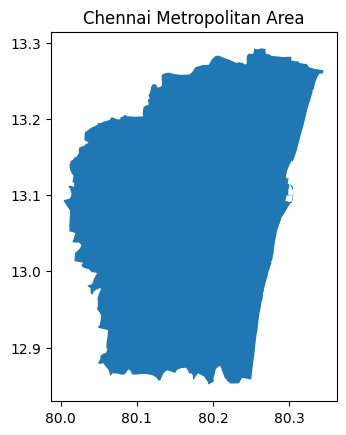

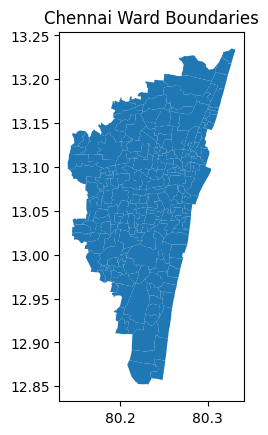

In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the CMA shapefile
cma_shapefile = 'cma_layer.shp'
gdf_cma = gpd.read_file(cma_shapefile)

# Load the ward shapefile (if needed)
ward_shapefile = 'ward_layer (as of Oct 2011).shp'
gdf_ward = gpd.read_file(ward_shapefile)

# Plot the CMA boundary (optional)
gdf_cma.plot()
plt.title("Chennai Metropolitan Area")
plt.show()

# Plot the ward boundaries (optional)
gdf_ward.plot()
plt.title("Chennai Ward Boundaries")
plt.show()


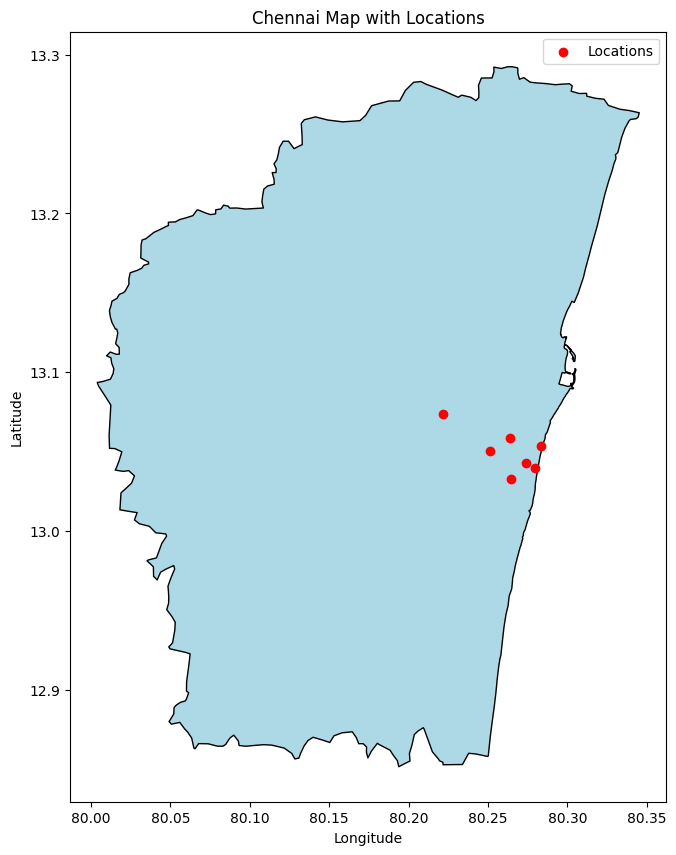

In [58]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the CMA shapefile
cma_shapefile = 'cma_layer.shp'
gdf = gpd.read_file(cma_shapefile)


df_locations = pd.read_csv('locations_with_lat_lon.csv')
# Plot the shapefile boundaries
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot your locations (assuming they are in a DataFrame `df_locations`)
plt.scatter(df_locations['Longitude'], df_locations['Latitude'], color='red', marker='o', label='Locations')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Chennai Map with Locations')
plt.show()


In [60]:
import numpy as np
from geopy.distance import great_circle

# Convert latitude and longitude to radians
lat_rad = np.radians(df_locations['Latitude'])
lon_rad = np.radians(df_locations['Longitude'])

# Convert to Cartesian coordinates
x = np.cos(lat_rad) * np.cos(lon_rad)
y = np.cos(lat_rad) * np.sin(lon_rad)
z = np.sin(lat_rad)

# Calculate the mean of Cartesian coordinates
x_mean = x.mean()
y_mean = y.mean()
z_mean = z.mean()

# Convert back to spherical coordinates
lon_mid = np.arctan2(y_mean, x_mean)
hyp = np.sqrt(x_mean**2 + y_mean**2)
lat_mid = np.arctan2(z_mean, hyp)

# Convert back to degrees
lat_mid = np.degrees(lat_mid)
lon_mid = np.degrees(lon_mid)

print(f"Midpoint latitude: {lat_mid}, longitude: {lon_mid}")

Midpoint latitude: 13.05024543591047, longitude: 80.26263587238336


In [62]:
# Define midpoint coordinates
midpoint = (lat_mid, lon_mid)

# Calculate distances and filter locations within 20km
df_locations['distance_from_midpoint'] = df_locations.apply(
    lambda row: great_circle(midpoint, (row['Latitude'], row['Longitude'])).km, axis=1
)

# Filter locations within 20km radius
df_filtered_locations = df_locations[df_locations['distance_from_midpoint'] <= 20]

print(df_filtered_locations)

                       name   Latitude  Longitude  distance_from_midpoint
0       Express Avenue Mall  13.058821  80.264103                0.966660
1       Chennai Citi Centre  13.043025  80.273870                1.457986
2        Chennai Lighthouse  13.039716  80.279442                2.164511
3              Marina Beach  13.053275  80.283289                2.262393
4           Semmozhi Poonga  13.050626  80.251510                1.205941
5  Sai Baba Temple Mylapore  13.032698  80.264734                1.964377
6           PVR Ampa SkyOne  13.073553  80.221499                5.154814


In [66]:
from shapely.geometry import Point

# Create a GeoDataFrame for filtered locations
gdf_filtered_locations = gpd.GeoDataFrame(
    df_filtered_locations,
    geometry=gpd.points_from_xy(df_filtered_locations.Longitude, df_filtered_locations.Latitude),
    crs=gdf.crs  # Use the same CRS as the shapefile
)

# Spatial join to ensure locations are within the Chennai boundary
gdf_final_filtered = gpd.sjoin(gdf_filtered_locations, gdf, how='inner', predicate='within')

# Print or visualize the filtered locations
print(gdf_final_filtered)


                       name   Latitude  Longitude  distance_from_midpoint  \
0       Express Avenue Mall  13.058821  80.264103                0.966660   
1       Chennai Citi Centre  13.043025  80.273870                1.457986   
2        Chennai Lighthouse  13.039716  80.279442                2.164511   
3              Marina Beach  13.053275  80.283289                2.262393   
4           Semmozhi Poonga  13.050626  80.251510                1.205941   
5  Sai Baba Temple Mylapore  13.032698  80.264734                1.964377   
6           PVR Ampa SkyOne  13.073553  80.221499                5.154814   

                    geometry  index_right                       NAME  
0   POINT (80.2641 13.05882)            0  Chennai Metropolitan Area  
1  POINT (80.27387 13.04302)            0  Chennai Metropolitan Area  
2  POINT (80.27944 13.03972)            0  Chennai Metropolitan Area  
3  POINT (80.28329 13.05328)            0  Chennai Metropolitan Area  
4  POINT (80.25151 13.05063)

In [16]:
# Can save model 

In [24]:
import joblib
joblib.dump(price_pipeline, 'distModels/price_pipeline.pkl')
joblib.dump(waiting_pipeline, 'distModels/waiting_pipeline.pkl')
joblib.dump(time_pipeline, 'distModels/time_pipeline.pkl')

['distModels/time_pipeline.pkl']